<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/PARCIAL2/1Puntoparcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Solución teórica del espectro de Fourier de Forma Exponencial y Trigonometrica**

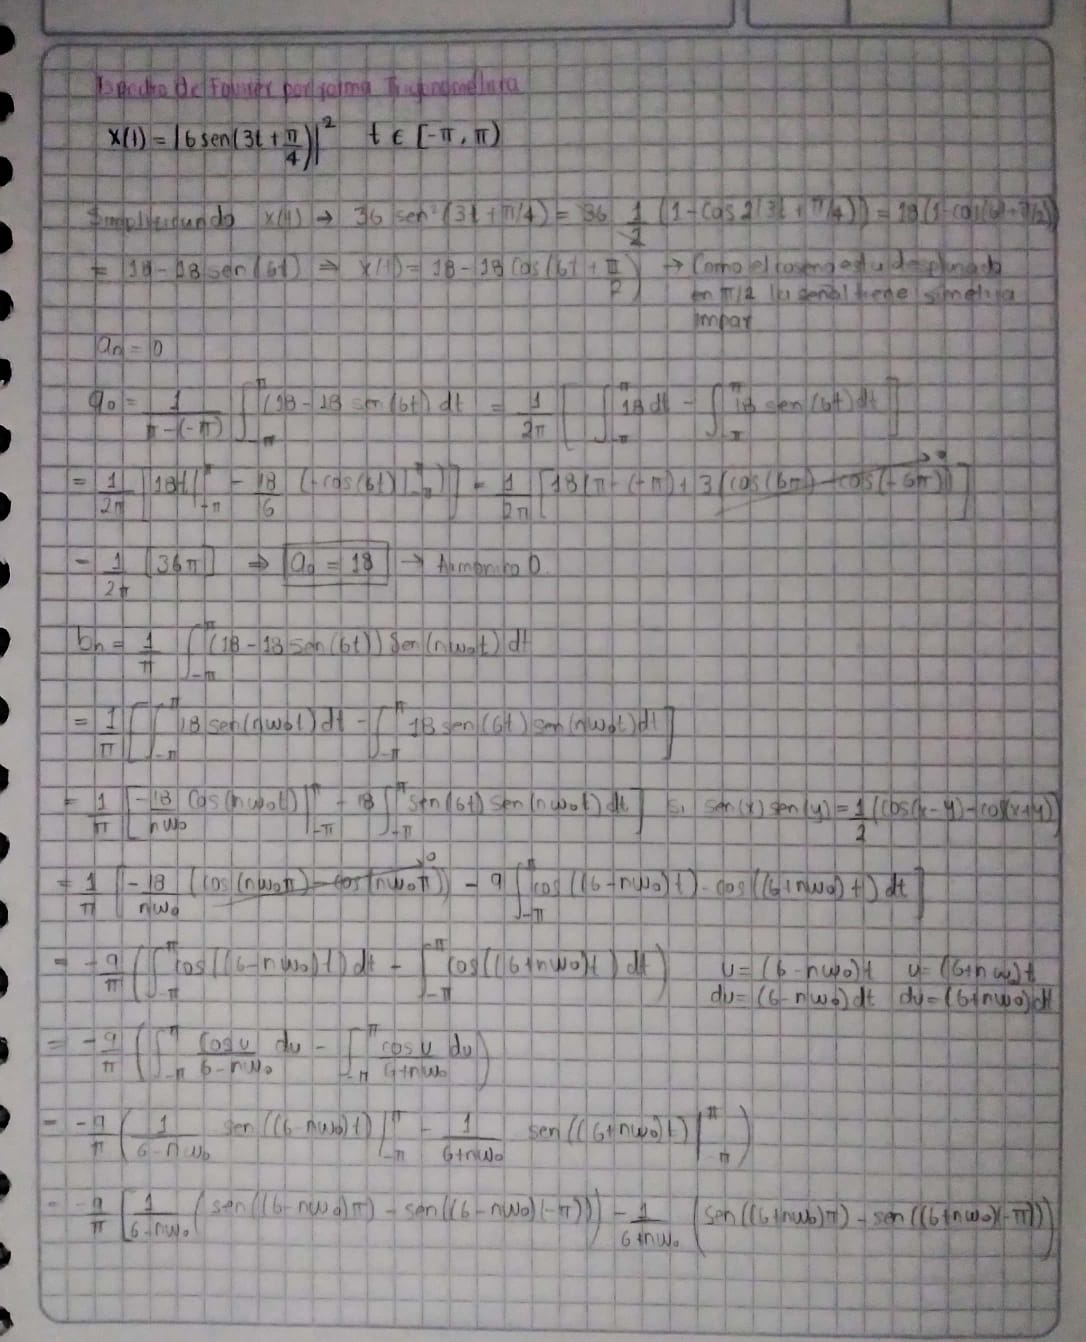

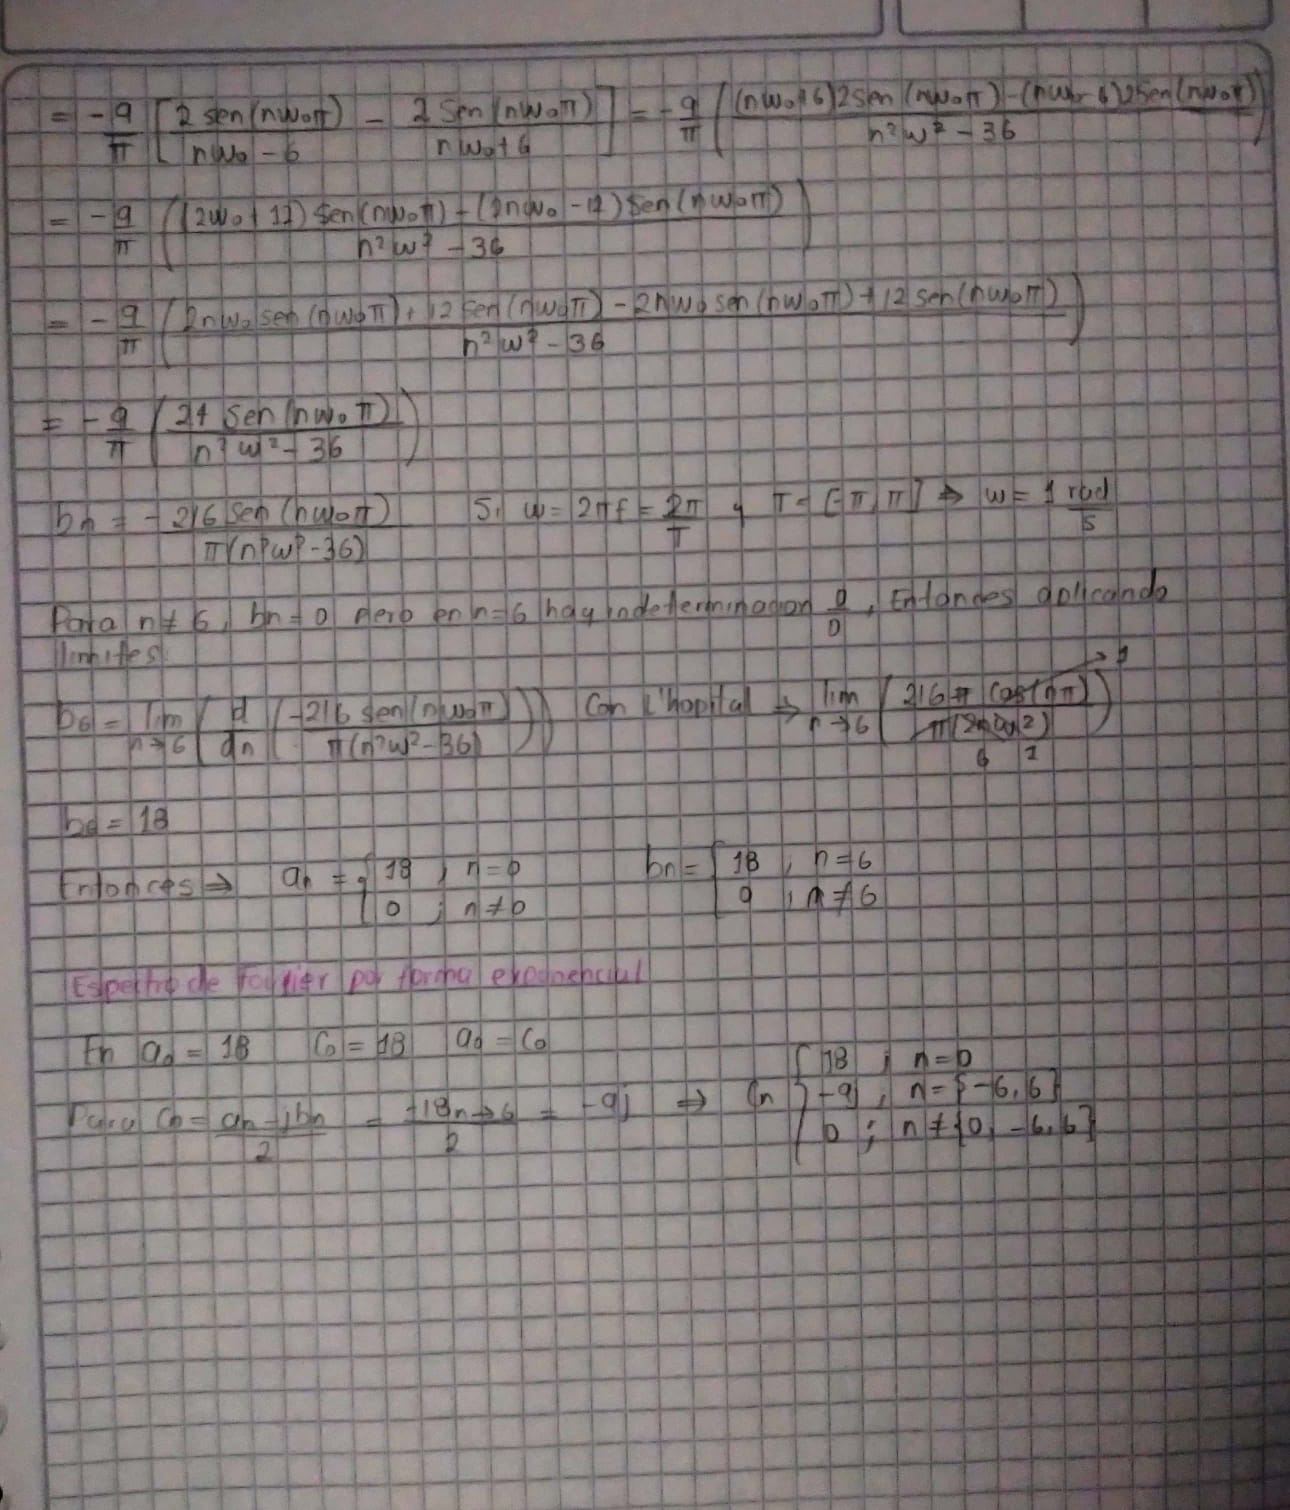

Calculamos el espectro con la serie exponencial de Fourier  $$c_n = \frac{1}{T}\int_T x(t)e^{-jn\omega_ot}dt$$

In [3]:
#Librerías utilizadas
import matplotlib as mpl
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import warnings
from ipywidgets import interact,IntSlider
from matplotlib import animation, rc
from IPython.display import HTML
warnings.filterwarnings("ignore")


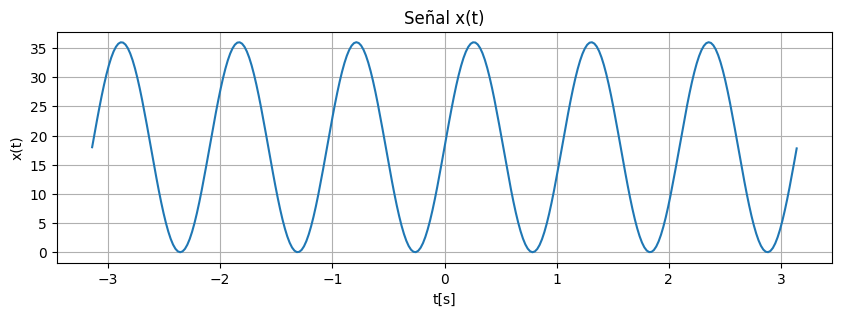

In [5]:
#Señal seno
ti = -np.pi
tf = np.pi
T = tf - ti
Ff = 3/2*np.pi #Frecuencia Fundamental
#Aplicando el teorema de Nyquist y con el fin de tomar una mejor frecuencia de muestreo aumentamos el valor por 10
Fs = 10*Ff
vt = np.arange(ti, tf, 1/Fs) #vector tiempo
x = np.abs(6*np.sin(3*vt + (np.pi/4)))**2 #señal x(t)
plt.figure(figsize=(10,3))
plt.grid()
plt.title("Señal x(t)")
plt.xlabel("t[s]",fontsize = 10)
plt.ylabel("x(t)",fontsize = 10)
plt.plot(vt,x)
plt.show()


In [6]:
#Matriz de armonicos (Bases de Fourier)
M = len(vt)
N = 10 #número de armónicos
Wo = 2*np.pi/T #frecuencia fundamental
bases = np.zeros((M,2*N+1),dtype=np.complex_) #matriz
for n in range(-N,N+1,1):
    bases[:,n+N] = np.exp(1j*n*Wo*vt)
bases.shape

(297, 21)

In [7]:
#Representación Gráfica de las bases de Fourier
fig, ax = plt.subplots(1, 1,figsize=(10,3))
def pltbases(n=1):

    plt.plot(vt,np.real(bases[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 10)
    plt.ylabel("$\phi_n$(t)",fontsize = 10)
    plt.plot(vt,np.imag(bases[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(vt,x,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return

interact(pltbases,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.pltbases(n=1)>

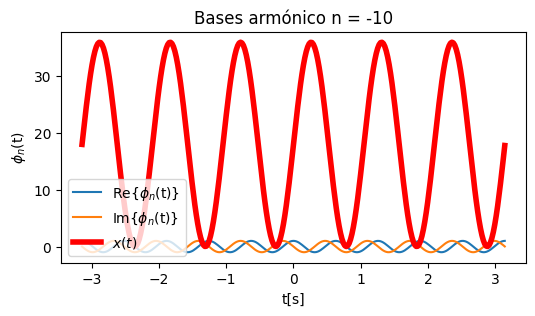

In [11]:
fig, ax = plt.subplots(1, 1,figsize=(6,3))
#función para gráfico interactivo
def update(n):
    ax.clear()
    ax.plot(vt,np.real(bases[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    ax.set_xlabel("t[s]",fontsize = 10)
    ax.set_ylabel("$\phi_n$(t)",fontsize = 10)
    ax.plot(vt,np.imag(bases[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    ax.plot(vt,x,'r',linewidth=4,label='$x(t)$')
    ax.set_title(f'Bases armónico n = {n}')
    ax.legend(loc='lower left')
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(-N,N,1), blit=False)
rc('animation', html='jshtml')
anim

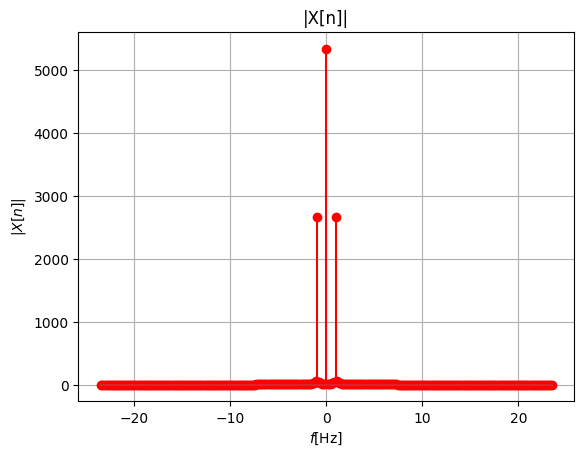

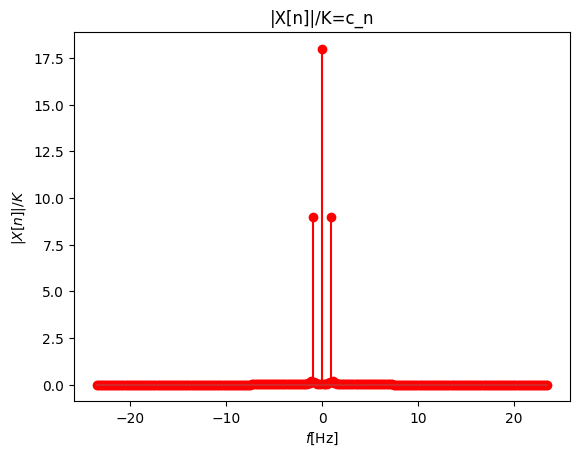

In [12]:
#Transformada de Fourier de la señal
vf = np.fft.fftfreq(len(x),1/Fs) #calculo vector de frecuencias
XF = np.fft.fft(x) #cálculo FFT

plt.stem(vf,abs(XF),'r')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 10)
plt.ylabel(r'$|X[n]|$',fontsize = 10)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(XF)/len(vf),'r')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 10)
plt.ylabel(r'$|X[n]|/K$',fontsize = 10)
plt.show()

In [13]:
#Cálculo del espectro de la señal
#Para el armónico cero se tiene:
t, n, Wo = sym.symbols('t n Wo')
x2 = sym.Abs(6 * sym.sin(3 * t + sym.pi / 4))**2
# Cálculo de A0
A0 = (1 / (2 * sym.pi)) * sym.integrate(x2, (t, -sym.pi, sym.pi))
print("A0 =", A0)

A0 = 18


In [14]:
#Espectro de la señal para n armónicos
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
cn[N] = 18 #Nivel DC de la señal
cn[N - 6] = -9
cn[N + 6] = -9

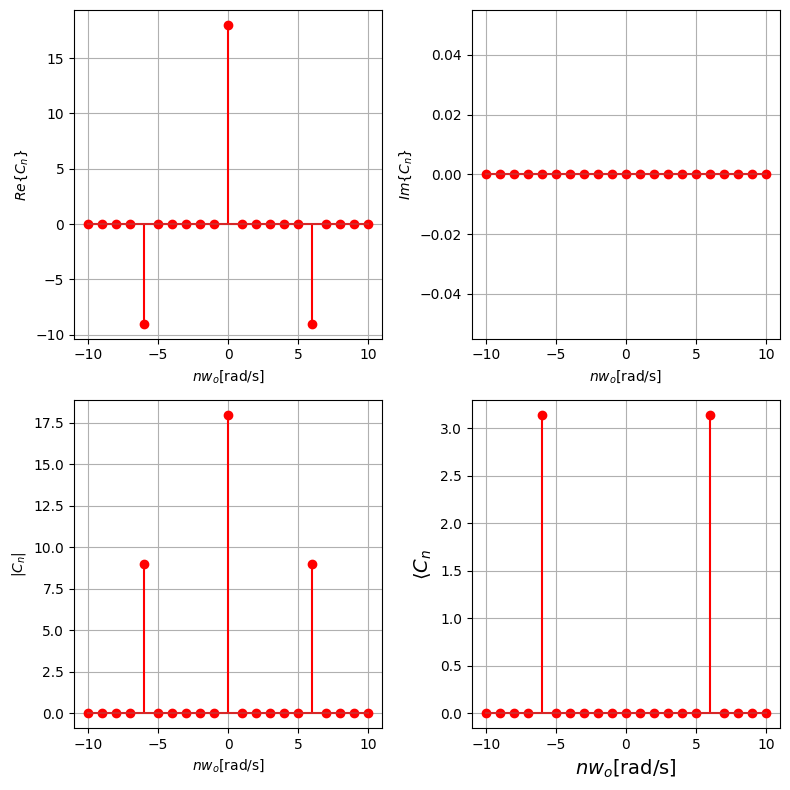

In [15]:
#Gráficas en base al espectro calculado con fourier
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 10)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 10)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 10)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 10)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 10)
plt.ylabel(r'$|C_n|$',fontsize = 10)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [62]:
#Reconstrucción de la señal
t = sym.symbols('t', Real = True)
xp = 6*sym.sin(3*t + sym.pi/4) #señal propuesta
xp2 = np.abs(xp)**2
xabs= np.abs(xp2) #señal en valor absoluto
Px = sym.integrate(xabs, (t,-sym.pi, sym.pi))
#P = P/sym.pi)/2
print("La potencia de la señal es: ")
Px

La potencia de la señal es: 


36*pi

In [64]:
#Error relativo
er = 1 - (((cn[N-6])**2)+((cn[N+6])**2)+((cn[N])**2))/(36**np.pi)
er

(0.9937285528600781+0j)

In [65]:
#Gráfica del error relativo
Px= 36**np.pi
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px #señal reconstruida
    xe = bases[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(vt,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(vt,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=10)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>